In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [93]:
df_temp = pd.read_csv("./datasets_models/mean_temp_x_day.csv").drop(["codi_variable"], axis=1)
df_hume = pd.read_csv("./datasets_models/mean_hume_x_day.csv").drop(["codi_variable"], axis=1)
df_precip = pd.read_csv("./datasets_models/mean_precip_x_day.csv").drop(["codi_variable"], axis=1)

In [79]:
df_temp['valor_anterior'] = df_temp.groupby('comarca')['valor_lectura'].shift(1)

In [80]:
df_temp['data_lectura'] = pd.to_datetime(df_temp['data_lectura'])
df = df_temp.dropna().reset_index(drop=True)
df['mes'] = df['data_lectura'].dt.month
df = df.drop(["data_lectura"], axis=1)

In [81]:
df

,comarca,valor_lectura,valor_anterior,mes
0,Vallès Oriental,7.416667,8.059722,1
1,Vallès Oriental,5.665278,7.416667,1
2,Vallès Oriental,4.345833,5.665278,1
3,Vallès Oriental,3.138824,4.345833,1
4,Vallès Oriental,1.035417,3.138824,1
...,...,...,...,...
37088,Vallès Occidental,21.832143,23.057962,7
37089,Vallès Occidental,22.760119,21.832143,7
37090,Vallès Occidental,23.723214,22.760119,7
37091,Vallès Occidental,25.869048,23.723214,7


In [82]:
dicc_comarques = {}

# Itera sobre las comarcas únicas en el dataframe
for comarca in df['comarca'].unique():
    # Filtra las filas correspondientes a la comarca actual
    df_comarca = df[df['comarca'] == comarca].copy()
    
    # Elimina la columna "comarca" del dataframe resultante
    df_comarca.drop('comarca', axis=1, inplace=True)
    
    # Almacena el dataframe en el diccionario
    dicc_comarques[comarca] = df_comarca.reset_index(drop=True)

In [83]:
comarques_bcn = list(dicc_comarques.keys())
comarques_bcn

['Vallès Oriental',
 'Alt Penedès',
 'Baix Llobregat',
 'Barcelonès',
 'Garraf',
 'Maresme',
 'Vallès Occidental']

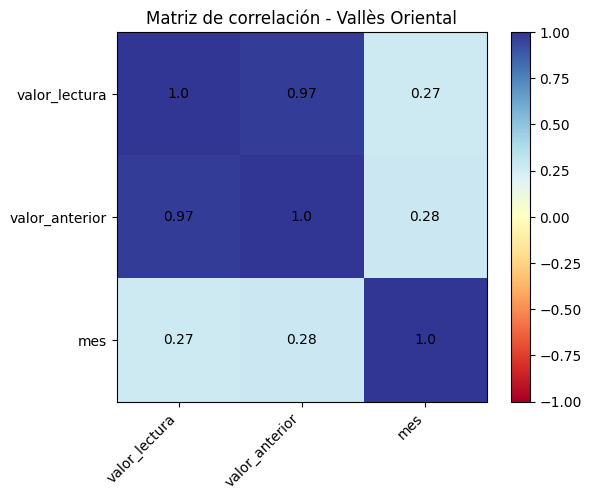

In [84]:
comarca = 0
matriz_correlacion = dicc_comarques[comarques_bcn[comarca]].corr()

fig, ax = plt.subplots()
im = ax.imshow(matriz_correlacion, cmap='RdYlBu', vmin=-1, vmax=1,)
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(range(len(matriz_correlacion.columns)))
ax.set_yticks(range(len(matriz_correlacion.columns)))
ax.set_xticklabels(matriz_correlacion.columns)
ax.set_yticklabels(matriz_correlacion.columns)

plt.xticks(rotation=45, ha='right')

for i in range(len(matriz_correlacion.columns)):
    for j in range(len(matriz_correlacion.columns)):
        text = ax.text(j, i, round(matriz_correlacion.iloc[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_title(f"Matriz de correlación - {comarques_bcn[comarca]}")

plt.show()

In [85]:
comarca = 0
x = dicc_comarques[comarques_bcn[comarca]].drop(["valor_lectura"], axis=1)
y = dicc_comarques[comarques_bcn[comarca]].valor_lectura

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

In [86]:
for i in range(10):
    poly_features = PolynomialFeatures(degree=i+1)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)

    data = pd.DataFrame({'valor_anterior': [25.43095238095238], 'mes': [7]}, index=[0])
    print(type(data))

    poly_data = poly_features.transform(data)

    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    y_pred = model.predict(x_test_poly)
    print(model.predict(poly_data))

    print(f'Fit&Predict with degree: {i+1}')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"R2 Score: {r2}\n")

<class 'pandas.core.frame.DataFrame'>
[25.08791369]
Fit&Predict with degree: 1
Error cuadrático medio (MSE): 2.332906976153451
R2 Score: 0.9461961009224857

<class 'pandas.core.frame.DataFrame'>
[25.16759387]
Fit&Predict with degree: 2
Error cuadrático medio (MSE): 2.2006473208345727
R2 Score: 0.949246409065735

<class 'pandas.core.frame.DataFrame'>
[25.02871545]
Fit&Predict with degree: 3
Error cuadrático medio (MSE): 2.1342106525195845
R2 Score: 0.9507786398120117

<class 'pandas.core.frame.DataFrame'>
[25.07059479]
Fit&Predict with degree: 4
Error cuadrático medio (MSE): 2.128230391259117
R2 Score: 0.9509165627453324

<class 'pandas.core.frame.DataFrame'>
[25.06308328]
Fit&Predict with degree: 5
Error cuadrático medio (MSE): 2.1264195970504742
R2 Score: 0.9509583251429967

<class 'pandas.core.frame.DataFrame'>
[24.99113573]
Fit&Predict with degree: 6
Error cuadrático medio (MSE): 2.122464186132265
R2 Score: 0.9510495488960348

<class 'pandas.core.frame.DataFrame'>
[24.95624319]
Fit&

In [87]:
poly_features = PolynomialFeatures(degree=4)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

data = pd.DataFrame({'valor_anterior': [25.43095238095238], 'mes': [7]}, index=[0])
print(type(data))

poly_data = poly_features.transform(data)

model = LinearRegression()
model.fit(x_train_poly, y_train)
fecha = pd.Timestamp('2021-07-20')
datos = []
for i in range(720):
    pred = model.predict(poly_data)
    print("prediction: ", pred, fecha)
    datos.append([pred, fecha])
    fecha += pd.Timedelta(days=1)
    data = pd.DataFrame({'valor_anterior': pred, 'mes': [fecha.month]}, index=[0])
    poly_data = poly_features.transform(data)

<class 'pandas.core.frame.DataFrame'>
prediction:  [25.07059479] 2021-07-20 00:00:00
prediction:  [24.76098676] 2021-07-21 00:00:00
prediction:  [24.49449388] 2021-07-22 00:00:00
prediction:  [24.26474131] 2021-07-23 00:00:00
prediction:  [24.06638245] 2021-07-24 00:00:00
prediction:  [23.89491441] 2021-07-25 00:00:00
prediction:  [23.74653026] 2021-07-26 00:00:00
prediction:  [23.6180001] 2021-07-27 00:00:00
prediction:  [23.50657495] 2021-07-28 00:00:00
prediction:  [23.40990842] 2021-07-29 00:00:00
prediction:  [23.32599266] 2021-07-30 00:00:00
prediction:  [23.25310562] 2021-07-31 00:00:00
prediction:  [22.94751368] 2021-08-01 00:00:00
prediction:  [22.69695982] 2021-08-02 00:00:00
prediction:  [22.49057204] 2021-08-03 00:00:00
prediction:  [22.31991953] 2021-08-04 00:00:00
prediction:  [22.17837675] 2021-08-05 00:00:00
prediction:  [22.06067871] 2021-08-06 00:00:00
prediction:  [21.96260246] 2021-08-07 00:00:00
prediction:  [21.88073442] 2021-08-08 00:00:00
prediction:  [21.812297

In [88]:
datos_hume = pd.DataFrame(datos)

In [89]:
datos_hume

,0,1
0,[25.07059478714178],2021-07-20
1,[24.760986762209576],2021-07-21
2,[24.494493878734914],2021-07-22
3,[24.264741305007668],2021-07-23
4,[24.066382447544953],2021-07-24
...,...,...
715,[21.6242872323144],2023-07-05
716,[21.766763545089056],2023-07-06
717,[21.891826735419635],2023-07-07
718,[22.001510487323706],2023-07-08


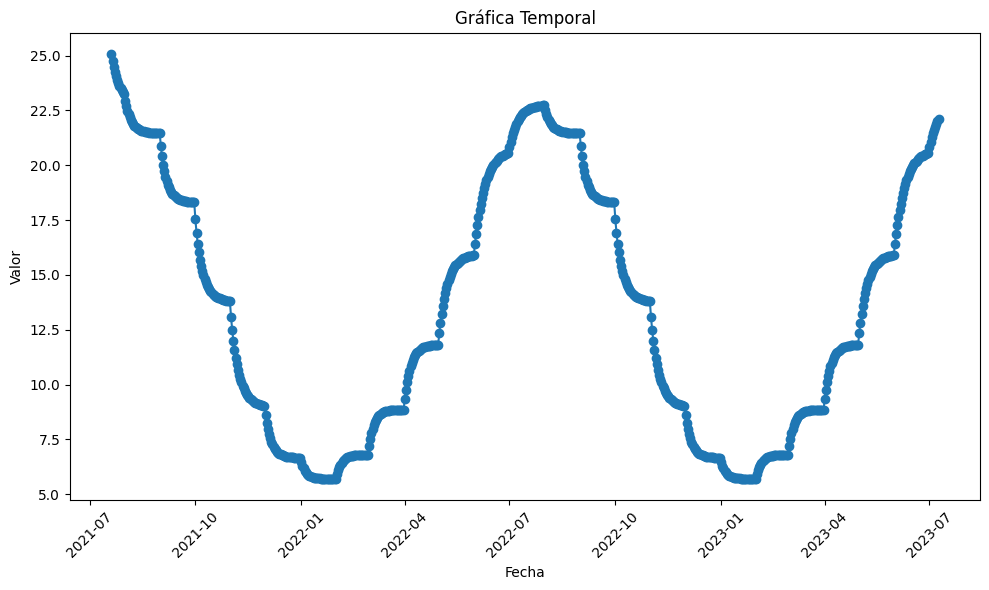

In [90]:
plt.figure(figsize=(10, 6))
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Gráfica Temporal')

# Dibujar la gráfica temporal
plt.plot(datos_hume[1], datos_hume[0], marker='o', linestyle='-')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [94]:
datos_reales = df_precip[df_precip["comarca"] == "Vallès Oriental"].iloc[-720:][["valor_lectura", "data_lectura"]]

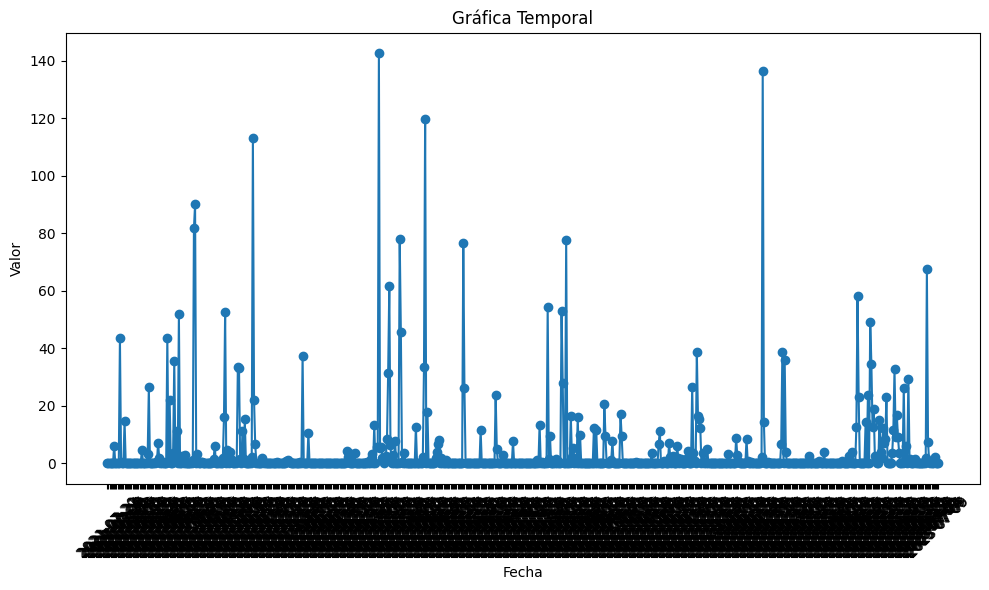

In [95]:
plt.figure(figsize=(10, 6))
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Gráfica Temporal')

# Dibujar la gráfica temporal
plt.plot(datos_reales["data_lectura"], datos_reales["valor_lectura"], marker='o', linestyle='-')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()